### Demo

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
random.seed(2)

In [2]:
# Generate random data

In [3]:
pts = sorted([random.uniform(-1,1) for i in range(10)])
pts

[-0.8868972645463826,
 -0.8302560096821567,
 -0.3837270848217116,
 0.21188833135692486,
 0.21360346728167579,
 0.3394608028804418,
 0.4719399781370466,
 0.6709977562588991,
 0.8956549741186988,
 0.9120685437784988]

In [4]:
def f(x):
    return x**2 + 0.1 * x**3

In [5]:
vals = [f(x) + random.gauss(0,0.05) for x in pts]
vals

[0.6912018743694479,
 0.6177537266921855,
 0.09626103527966781,
 0.06694857118378927,
 0.019225533354785933,
 -0.040744942369522974,
 0.2927729545960474,
 0.46085470134404594,
 0.8368794644394691,
 0.9211608288524525]

In [6]:
# fit with least squares, three basis functions
A = np.array([[1,x,x**2] for x in pts])
w = np.linalg.solve(np.dot(np.transpose(A),A), np.dot(np.transpose(A),vals))
w

array([-0.04926904,  0.07556793,  1.04763959])

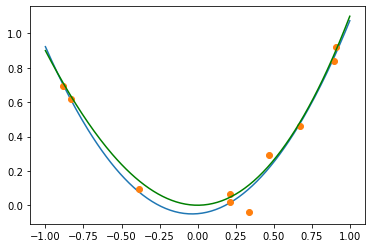

In [7]:
# Plotting:
# blue: fit,
# orange points: data
# green: true curve

plt_x = np.arange(-1,1.01,0.01);
plt_y = [w[0]+w[1]*x+w[2]*x**2 for x in plt_x]
plt_y_true = [f(x) for x in plt_x]
plt.plot(plt_x,plt_y,'-', pts,vals,'o', plt_x,plt_y_true,'-g')

### Задание

1. Сделать фит для разной степени полинома
1. Сделать кросс-валидацию и определить погрешность фита
1. Определить, начиная с какого числа точек (примерно) кубический фит лучше (точнее) квадратичного

#### Задание 1

In [72]:
def solve_linear_system(vals, pts, N_fit):
  A = np.array([[x**n for n in range(N_fit+1)] for x in pts])
  w = np.linalg.solve(np.dot(np.transpose(A),A), np.dot(np.transpose(A),vals))
  return w

In [73]:
N_fit = 3
w = solve_linear_system(vals, pts, N_fit)

In [74]:
def plot_fit(w, pts, vals, N_fit):
  plt_x = np.arange(-1,1.01,0.01);
  plt_y = [np.sum([w[n] * x**n for n in range(N_fit+1)]) for x in plt_x]
  plt_y_true = [f(x) for x in plt_x]
  plt.plot(plt_x, plt_y, '-', label=f'{N_fit}th fit')
  plt.plot(pts, vals, 'o', label='Data')
  plt.plot(plt_x, plt_y_true, '-', lw=3, label='True curve')
  plt.legend()
  plt.show()

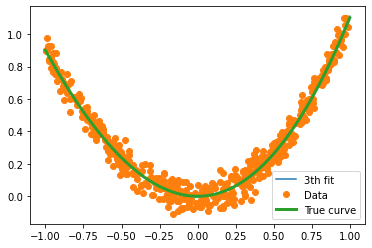

In [75]:
plot_fit(w, pts, vals, N_fit)

#### Задание 2

In [76]:
N_folds = 5
N_fit = 3

In [77]:
def make_folds(x: list, y:list, N: int) -> tuple:
  length = len(x)
  folds_x = []
  folds_y = []
  for n in range(N-1):
    low_bound = int(n / N * length)
    high_bound = int((n + 1) / N * length)
    folds_x.append(x[low_bound:high_bound])
    folds_y.append(y[low_bound:high_bound])
  folds_x.append(x[high_bound:])
  folds_y.append(y[high_bound:])
  return folds_x, folds_y

In [78]:
folds_x, folds_y = make_folds(pts, vals, N_folds)
folds_x, folds_y

([[-0.9979748760857297,
   -0.9929426107197794,
   -0.9901016686151489,
   -0.98995344643851,
   -0.9861474789764202,
   -0.9742417998995334,
   -0.9737993616769536,
   -0.9655596371588824,
   -0.9611077028985056,
   -0.960315356072835,
   -0.9602876699043861,
   -0.9569786549200952,
   -0.9525356990662985,
   -0.9506285610113101,
   -0.9503490027221979,
   -0.9488419706529858,
   -0.9482919460609902,
   -0.9448990924197425,
   -0.9412343646216756,
   -0.9365859858647401,
   -0.9341230389147317,
   -0.9325760028785641,
   -0.9274764634417014,
   -0.924710198982402,
   -0.9222130137119195,
   -0.9181851944880868,
   -0.910981434022079,
   -0.9069525772467584,
   -0.9033929095548208,
   -0.895734702228624,
   -0.8881322281354522,
   -0.8834814385614795,
   -0.8829454141426003,
   -0.8779882127803136,
   -0.876670078049939,
   -0.8752746801919664,
   -0.8718093209935249,
   -0.865516136519624,
   -0.8592687598175996,
   -0.8584477433441295,
   -0.8566835132352686,
   -0.8414027909773967,


In [124]:
def get_msd_in_cross_validation(pts, vals, N_folds, N_fit):
  msd_global = []
  fig, axs = plt.subplots(nrows=N_folds, ncols=1, figsize=(6, 4*N_folds))
  for i, ax in zip(range(N_folds), axs):
    folds_x, folds_y = make_folds(pts, vals, N_folds)
    test_x = folds_x.pop(i)
    train_x = [elem for sublist in folds_x for elem in sublist]
    test_y = folds_y.pop(i)
    train_y = [elem for sublist in folds_y for elem in sublist]

    w = solve_linear_system(train_y, train_x, N_fit)

    plt_x = np.linspace(np.min(pts), np.max(pts), 100)
    plt_y = [np.sum([w[n] * x**n for n in range(N_fit+1)]) for x in plt_x]
    
    
    plt_y_true = [f(x) for x in plt_x]
    

    msd = np.mean((np.array(plt_y) - np.array(plt_y_true))**2)
    msd_global.append(msd)

    ax.plot(plt_x, plt_y, '-', label=f'{N_fit}th fit')
    ax.plot(test_x, test_y, 'o', label='Test data')
    ax.plot(train_x, train_y, 'x', label='Train data')
    ax.plot(plt_x, plt_y_true, '-', lw=3, label='True curve')
    ax.set_title(f'MSD = {msd:e}')
    ax.legend()
  plt.show()

  return msd_global

In [125]:
def get_msd_in_cross_validation_without_plots(pts, vals, N_folds, N_fit):
  msd_global = []
  for i in range(N_folds):
    folds_x, folds_y = make_folds(pts, vals, N_folds)
    test_x = folds_x.pop(i)
    train_x = [elem for sublist in folds_x for elem in sublist]
    test_y = folds_y.pop(i)
    train_y = [elem for sublist in folds_y for elem in sublist]

    w = solve_linear_system(train_y, train_x, N_fit)

    plt_x = np.linspace(np.min(pts), np.max(pts), 100)
    plt_y = [np.sum([w[n] * x**n for n in range(N_fit+1)]) for x in plt_x]
    plt_y_true = [f(x) for x in plt_x]

    msd = np.mean((np.array(plt_y) - np.array(plt_y_true))**2)
    msd_global.append(msd)

  return msd_global

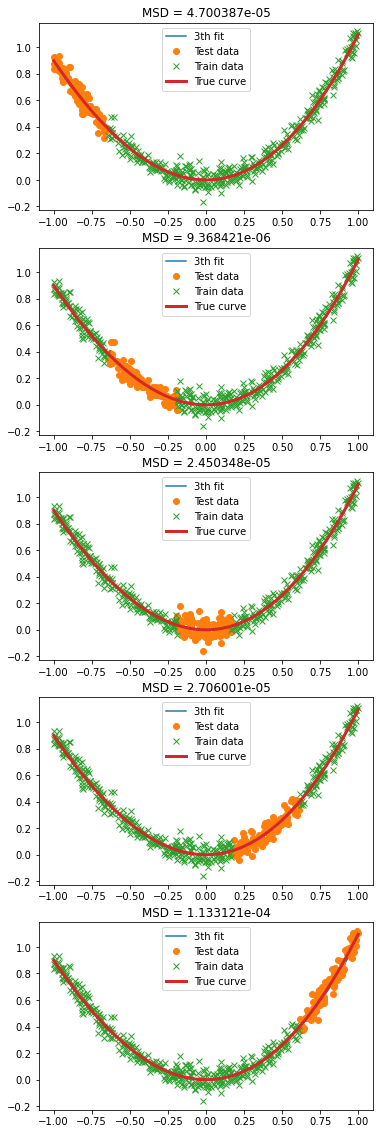

In [126]:
msd_global = get_msd_in_cross_validation(pts, vals, 5, 3)

In [127]:
print(f'Result MSD: {np.mean(msd_global)}')

Result MSD: 4.424957099493925e-05


#### Задание 3

In [128]:
N_points = 50
N_folds = 5
N_fit = 2

In [129]:
pts = sorted([random.uniform(-1,1) for i in range(N_points)])
vals = [f(x) + random.gauss(0,0.05) for x in pts]

In [130]:
msd_global = get_msd_in_cross_validation_without_plots(pts, vals, N_folds, N_fit)
print(f'Result MSD: {np.mean(msd_global)}')

Result MSD: 0.0016902409913941146


In [131]:
N_fit = 3
msd_global = get_msd_in_cross_validation_without_plots(pts, vals, N_folds, N_fit)
print(f'Result MSD: {np.mean(msd_global)}')

Result MSD: 0.006935333183988189


In [132]:
N_folds = 5
N_points_list = range(5, 501, 5)

msd_mean_2_fit = []
msd_mean_3_fit = []

for N_points in N_points_list:
  pts = sorted([random.uniform(-1,1) for i in range(N_points)])
  vals = [f(x) + random.gauss(0,0.05) for x in pts]
  msd_global_2_fit = get_msd_in_cross_validation_without_plots(pts, vals, N_folds, N_fit=2)
  msd_mean_2_fit.append(np.mean(msd_global_2_fit))
  msd_global_3_fit = get_msd_in_cross_validation_without_plots(pts, vals, N_folds, N_fit=3)
  msd_mean_3_fit.append(np.mean(msd_global_3_fit))

In [133]:
# fit_flag is the first number of points, 
# since that 3th fit always better than 2nd fit
fit_flag = 0

for fit_2, fit_3, N_points in zip(msd_mean_2_fit[::-1], msd_mean_3_fit[::-1], N_points_list[::-1]):
  if fit_3 < fit_2:
    fit_flag = N_points
  else:
    break

[]

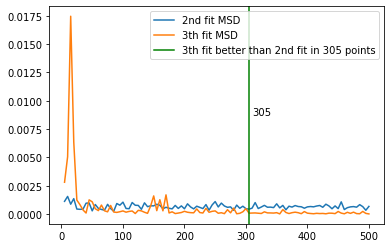

In [134]:
plt.figure()
plt.plot(N_points_list, msd_mean_2_fit, label='2nd fit MSD')
plt.plot(N_points_list, msd_mean_3_fit, label='3th fit MSD')
plt.axvline(fit_flag, 
            label=f'3th fit better than 2nd fit in {fit_flag} points',c='green')
plt.text(fit_flag+5, np.max([msd_mean_2_fit, msd_mean_3_fit]) / 2, f'{fit_flag}')
plt.legend()
plt.plot()

#### Задание 4 – Про E-tot

In [135]:
import pandas as pd

In [136]:
E_vol = pd.read_csv('E-vol.csv')
E_vol

,alat,e_tot,encut,n_kpts,sigma
0,3.850,-3.625901,240,8,0.05
1,3.855,-3.631549,240,8,0.05
2,3.860,-3.636837,240,8,0.05
3,3.865,-3.642171,240,8,0.05
4,3.870,-3.647122,240,8,0.05
...,...,...,...,...,...
60,4.150,-3.706087,240,8,0.05
61,4.155,-3.703858,240,8,0.05
62,4.160,-3.701721,240,8,0.05
63,4.165,-3.699430,240,8,0.05


In [151]:
def get_approximation(pts, vals, N_folds, N_fit):
    msd_global = []
    fig, axs = plt.subplots(nrows=N_folds, ncols=1, figsize=(6, 4*N_folds))
    for i, ax in zip(range(N_folds), axs):
        folds_x, folds_y = make_folds(pts, vals, N_folds)
        test_x = folds_x.pop(i)
        train_x = [elem for sublist in folds_x for elem in sublist]
        test_y = folds_y.pop(i)
        train_y = [elem for sublist in folds_y for elem in sublist]

        w = solve_linear_system(train_y, train_x, N_fit)

        plt_x = pts
        plt_y = [np.sum([w[n] * x**n for n in range(N_fit+1)]) for x in plt_x]

        plt_x_true = pts
        plt_y_true = vals

        msd = np.mean((np.array(plt_y) - np.array(plt_y_true))**2)
        msd_global.append(msd)

        E_min = np.min(plt_y)

        ax.plot(plt_x, plt_y, '-', label=f'{N_fit}th fit')
        ax.plot(test_x, test_y, 'o', label='Test data')
        ax.plot(train_x, train_y, 'x', label='Train data')
        ax.plot(plt_x_true, plt_y_true, '-', lw=3, label='True curve')
        ax.text(4.05, -3.7, r'$E_{min}$ = '+f'{E_min:.5}', ha='center')
        ax.set_title(f'MSD = {msd:e}')
        ax.legend()
    plt.show()

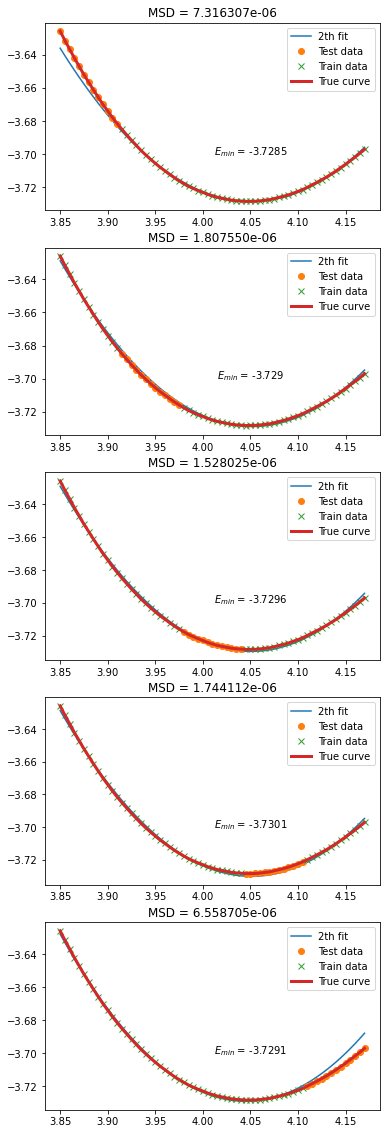

In [152]:
get_approximation(E_vol['alat'], E_vol['e_tot'], N_folds=5, N_fit=2)

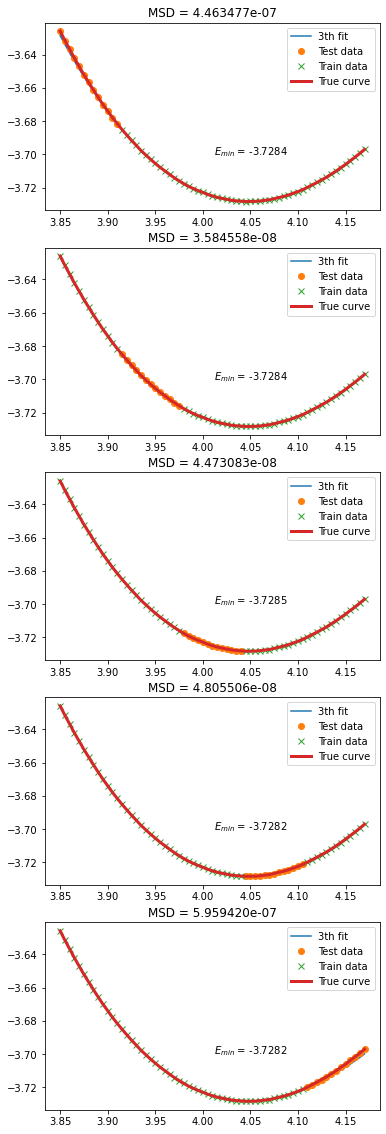

In [153]:
get_approximation(E_vol['alat'], E_vol['e_tot'], N_folds=5, N_fit=3)

В данном случае испоьзование полинома 3-ей степени дает меньшую ошибку по сравнению с ошибкой при использовании полинома второй степени.